In [510]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [511]:
n_task_per_file = 20
n_files = 10
base_dir = "noise_sd=1/vary_r_noisesd_1.0_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [512]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [513]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,UV(0.1),full
0,0.75,0.75,0.75,1.00,0.75,0.75,0.75,1.00,0.75,0.50
1,1.00,0.50,0.25,0.50,0.75,0.75,0.50,0.50,1.00,0.50
2,0.50,0.75,0.75,0.50,0.75,1.00,0.75,1.00,1.00,0.25
3,0.75,0.75,0.50,0.75,0.75,0.50,0.75,0.75,1.00,0.75
4,1.00,0.75,0.75,0.75,0.50,0.75,0.75,0.50,0.75,0.50
...,...,...,...,...,...,...,...,...,...,...
3,0.50,0.50,0.75,0.50,0.75,0.75,0.75,1.00,1.00,0.75
4,1.00,0.50,0.50,0.75,0.75,0.75,0.75,1.00,1.00,0.25
5,0.75,0.50,0.75,0.75,0.75,1.00,0.75,0.75,1.00,0.25
6,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.75,1.00,0.50


In [514]:
length_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,UV(0.1),full
0,27.287224,28.911401,21.779720,23.462918,22.479471,20.721659,19.190304,17.002355,1.959874,6.653938
1,32.446602,23.303820,22.871078,17.555388,20.064448,21.912975,18.560839,17.110845,1.991640,6.904032
2,37.054703,31.461239,26.706967,26.011466,24.052105,22.789083,21.993942,20.339810,1.968024,7.549257
3,36.310992,26.746773,25.093336,22.916593,21.715964,21.028628,20.957641,20.105542,2.452582,7.170523
4,30.793192,21.148252,24.841679,24.322639,20.537178,20.516512,19.086561,18.146204,2.480891,6.745572
...,...,...,...,...,...,...,...,...,...,...
3,24.074580,25.739186,24.144151,20.876618,20.196406,19.844187,15.986133,16.229913,2.286057,6.440753
4,35.888650,31.748013,26.584809,25.314801,24.386197,22.758211,19.235603,19.569862,2.363193,6.771674
5,40.727012,29.745152,26.842541,27.346799,26.968910,25.966251,24.933673,24.934529,1.794838,6.753681
6,28.189825,29.601894,22.370458,21.123697,19.142749,22.554910,17.949283,16.176717,2.091222,8.162981


In [515]:
MSE_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,UV(0.1),full
0,5.739350,4.963828,5.555206,5.396922,6.015460,5.001439,6.339369,5.091899,4.472499,5.091899
1,6.121263,6.536833,5.963658,5.953698,5.138428,5.865301,6.117072,5.738838,6.656065,5.738838
2,5.546129,5.915020,5.645156,5.915020,6.470379,5.252453,5.102670,5.990036,5.934737,5.990036
3,6.837124,7.174377,6.676831,8.203949,7.378859,7.802000,5.372891,7.126031,6.337809,7.126031
4,5.501549,6.646405,6.087906,6.667982,6.771704,7.112183,5.535210,6.135680,6.490890,6.135680
...,...,...,...,...,...,...,...,...,...,...
3,6.235352,5.657042,6.159649,6.215428,6.573018,6.356786,6.065097,6.941133,6.823567,6.941133
4,5.847883,4.872916,4.757534,5.310667,5.324457,5.171317,5.683808,5.743802,5.490678,5.743802
5,4.878753,5.719909,5.896176,5.501734,5.712281,5.999743,5.898807,6.230033,6.066581,6.230033
6,4.669000,4.448413,4.508728,4.531606,4.266123,4.877684,5.141600,4.274064,4.754980,4.274064


In [516]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,20)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1        0.792793
0.2        0.774775
0.3        0.715465
0.4        0.734234
0.5        0.700450
0.6        0.767267
0.7        0.792793
0.8        0.761261
UV(0.1)    0.909910
full       0.412162
dtype: float64
Length :
 0.1        32.466406
0.2        26.432799
0.3        24.174294
0.4        22.838457
0.5        21.662462
0.6        20.615373
0.7        19.249921
0.8        18.004743
UV(0.1)     2.257338
full        6.857441
dtype: float64
MSE :
 0.1        5.539378
0.2        5.521010
0.3        5.491368
0.4        5.641566
0.5        5.558094
0.6        5.488490
0.7        5.522239
0.8        5.647248
UV(0.1)    5.770483
full       5.647248
dtype: float64


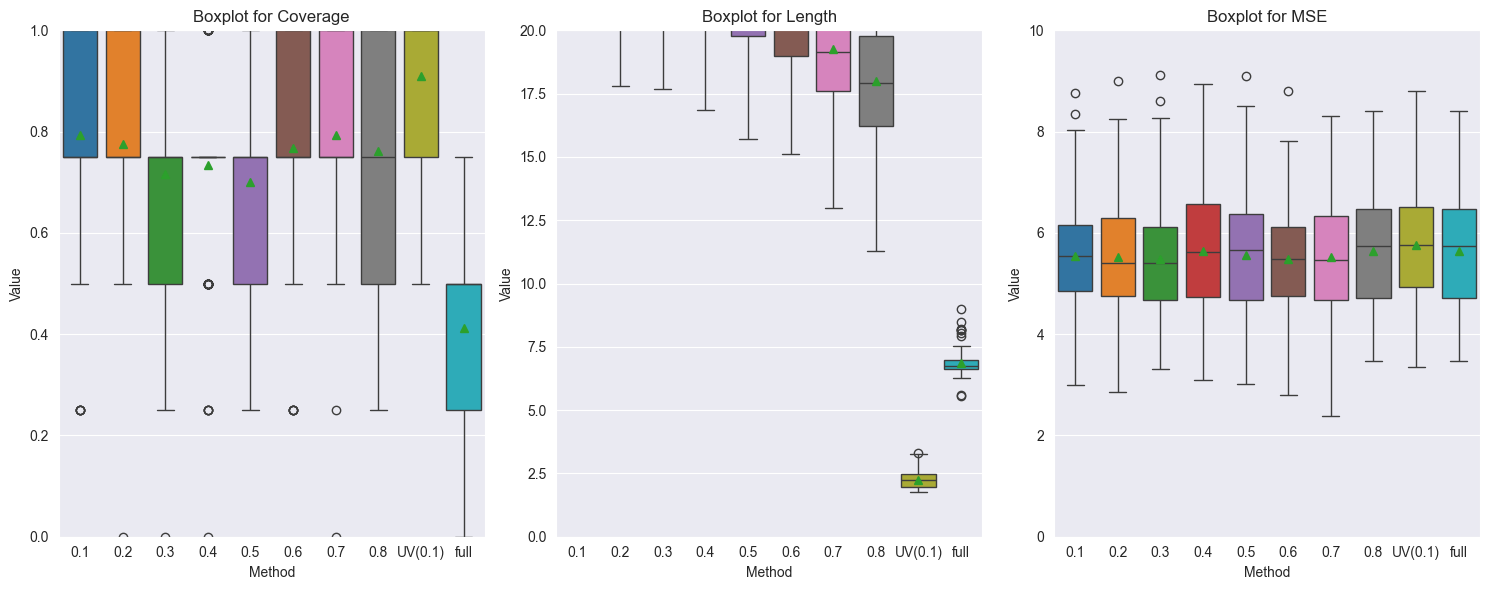

In [517]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [155]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,0.833333,0.833333,1.000000,1.000000,0.500000
2,0.500000,0.833333,1.000000,0.333333,0.833333,0.833333
3,0.833333,1.000000,0.857143,0.500000,0.833333,1.000000
4,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
4,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
5,0.833333,1.000000,1.000000,0.857143,0.600000,0.833333
6,1.000000,1.000000,1.000000,0.800000,0.833333,1.000000
7,1.000000,1.000000,1.000000,0.166667,1.000000,0.800000


In [397]:
a = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size=10)

In [403]:
a

array([[ 1.06793651,  1.36987016,  0.38254673],
       [-0.00676015,  0.04964653,  0.54545289],
       [ 0.36283111,  1.14141412, -0.09072415],
       [-0.35752269,  0.12027834,  1.73155615],
       [-0.2604219 , -0.41158687,  0.85320342],
       [-0.06342349,  0.26980504,  0.54805346],
       [ 3.11418919, -0.40739602,  0.14077256],
       [-1.10491165,  0.58322557, -0.02100113],
       [ 1.94883554,  0.87846771, -0.46144371],
       [-1.41438826,  0.90600893,  1.3235796 ]])

In [406]:
a.max(axis=1) < 1

array([False,  True, False, False,  True,  True, False,  True, False,
       False])

In [410]:
a.min(axis=1) > -1

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

In [413]:
np.logical_and(a.min(axis=1) > -1, a.max(axis=1) < 1).sum()

np.int64(3)